# Маркетинговый анализ  приложения Procrastinate Pro+. 

- Требуется провести анализ рекламной компании приложения
- Выявить причины убытков последних месяцев 
    - Окупается ли реклама, направленная на привлечение пользователей в целом
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы
    - Чем могут быть вызваны проблемы окупаемости
    - Описать возможные причины обнаруженных проблем 
    - Промежуточные рекомендации для рекламного отдела.

Исследование пройдёт в несколько этапов:
    
- Обзор данных.
- Предобработка данных.
- Исследовательский анализ данных.
- Маркетинговое исследование
- Анализ окупаемости рекламы.
- Проверка гипотез. 

In [1]:
import matplotlib.pyplot as plt # импорт библиотек
import numpy as np
import plotly.express as px
import pandas as pd
import seaborn as sns
from plotly import graph_objects as go
from datetime import datetime, timedelta
import calendar

In [2]:
pd.set_option("display.max_columns", None)  # изменение опции показа данных для отображения всех столбцов

In [3]:
pd.options.display.float_format = '{:,.2f}'.format  # изменение опции показа числовых данных

## Исходные данные

In [4]:
visits = pd.read_csv('/datasets/visits_info_short.csv') # чтение файлов с данными
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [5]:
# функция для общей провеки столбцов - она познакомит нас с данными в нужных колонках
def value(df,*columns):
    display(df.info())
    for column in columns:
        display(column)
        display(df[column].value_counts().sort_values(ascending=False))
        display('Количестово уникальных значений = {}'.format(len(df[column].unique())))
        display(df[column].describe(datetime_is_numeric=True))
        print('*'*20)

In [6]:
visits.sample(10,random_state=10) # получение общей информации о данных

,User Id,Region,Device,Channel,Session Start,Session End
209026,200153959279,Germany,Mac,organic,2019-05-05 09:41:51,2019-05-05 09:44:23
229979,795367275477,UK,Android,LeapBob,2019-06-17 20:29:55,2019-06-17 20:58:31
178679,833418121699,United States,Android,FaceBoom,2019-10-08 14:43:04,2019-10-08 14:45:01
165551,809555132475,United States,Android,organic,2019-09-29 15:57:52,2019-09-29 17:02:05
38660,370953998590,United States,Android,RocketSuperAds,2019-06-09 10:46:32,2019-06-09 12:00:57
10702,387592277004,United States,Android,organic,2019-05-12 06:22:19,2019-05-12 06:44:31
132435,293352760537,United States,Mac,organic,2019-09-03 10:16:40,2019-09-03 10:19:24
170952,101396729529,United States,iPhone,RocketSuperAds,2019-10-03 08:26:03,2019-10-03 08:29:29
17674,787109051013,United States,Mac,organic,2019-05-19 23:13:47,2019-05-19 23:17:34
222690,250551701184,UK,Mac,organic,2019-05-31 11:03:35,2019-05-31 11:22:58


In [7]:
value(visits,'Region','Device','Channel', 'Session Start', 'Session End')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

'Region'

United States    207327
UK                36419
France            35396
Germany           30759
Name: Region, dtype: int64

'Количестово уникальных значений = 4'

count            309901
unique                4
top       United States
freq             207327
Name: Region, dtype: object

********************


'Device'

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: Device, dtype: int64

'Количестово уникальных значений = 4'

count     309901
unique         4
top       iPhone
freq      112603
Name: Device, dtype: object

********************


'Channel'

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: Channel, dtype: int64

'Количестово уникальных значений = 11'

count      309901
unique         11
top       organic
freq       107760
Name: Channel, dtype: object

********************


'Session Start'

2019-08-24 12:06:37    3
2019-09-02 05:57:01    3
2019-10-15 09:47:57    3
2019-10-02 09:50:32    3
2019-10-26 12:40:03    3
                      ..
2019-09-28 20:16:17    1
2019-06-05 00:00:25    1
2019-08-29 15:03:28    1
2019-08-17 10:11:27    1
2019-10-04 22:55:59    1
Name: Session Start, Length: 306813, dtype: int64

'Количестово уникальных значений = 306813'

count                  309901
unique                 306813
top       2019-08-24 12:06:37
freq                        3
Name: Session Start, dtype: object

********************


'Session End'

2019-08-20 15:27:15    3
2019-09-23 20:37:13    3
2019-06-06 02:15:34    3
2019-08-27 20:15:44    3
2019-07-29 11:21:53    3
                      ..
2019-05-10 11:24:20    1
2019-05-23 02:28:42    1
2019-05-04 04:52:51    1
2019-09-15 00:08:56    1
2019-05-26 05:56:21    1
Name: Session End, Length: 306793, dtype: int64

'Количестово уникальных значений = 306793'

count                  309901
unique                 306793
top       2019-08-20 15:27:15
freq                        3
Name: Session End, dtype: object

********************


In [8]:
visits.columns = map(str.lower, visits.columns)  # корректировка наименования столбцов
visits.rename(columns={'session start': 'session_start','session end': 'session_end','user id':'user_id' }, inplace=True)
visits['session_start'] = pd.to_datetime(visits['session_start']) # приведение данных к необходимому типу
visits['session_end'] =  pd.to_datetime(visits['session_end']) # приведение данных к необходимому типу
visits.duplicated(keep=False).sum() # проверка дублткатов

0

In [9]:
visits.sample(10,random_state=10) # проверка после преобразования 

,user_id,region,device,channel,session_start,session_end
209026,200153959279,Germany,Mac,organic,2019-05-05 09:41:51,2019-05-05 09:44:23
229979,795367275477,UK,Android,LeapBob,2019-06-17 20:29:55,2019-06-17 20:58:31
178679,833418121699,United States,Android,FaceBoom,2019-10-08 14:43:04,2019-10-08 14:45:01
165551,809555132475,United States,Android,organic,2019-09-29 15:57:52,2019-09-29 17:02:05
38660,370953998590,United States,Android,RocketSuperAds,2019-06-09 10:46:32,2019-06-09 12:00:57
10702,387592277004,United States,Android,organic,2019-05-12 06:22:19,2019-05-12 06:44:31
132435,293352760537,United States,Mac,organic,2019-09-03 10:16:40,2019-09-03 10:19:24
170952,101396729529,United States,iPhone,RocketSuperAds,2019-10-03 08:26:03,2019-10-03 08:29:29
17674,787109051013,United States,Mac,organic,2019-05-19 23:13:47,2019-05-19 23:17:34
222690,250551701184,UK,Mac,organic,2019-05-31 11:03:35,2019-05-31 11:22:58


In [10]:
visits.info() # проверка после преобразования 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Описание  visits_info_short.csv:
    
    Файл хранит лог сервера с информацией о посещениях сайта

    User Id — уникальный идентификатор пользователя,
    Region — страна пользователя,
    Device — тип устройства пользователя,
    Channel — идентификатор источника перехода,
    Session Start — дата и время начала сессии,
    Session End — дата и время окончания сессии.
    
    Пропусков и явных дубликатов не выявлено 
    Скорректирвоаны наименования столбцов
    Типы данных приведены к нужному типу

In [11]:
orders.sample(10,random_state=10) # получение общей информации о данных

,User Id,Event Dt,Revenue
13343,142279100109,2019-08-19 01:35:03,4.99
12603,283678829664,2019-08-15 01:29:37,4.99
36911,404969463048,2019-09-29 08:59:44,4.99
38284,773620039300,2019-10-12 00:52:29,4.99
32043,414817784904,2019-07-31 14:23:33,4.99
3039,503702240061,2019-06-10 01:16:49,4.99
38731,560402030605,2019-10-17 17:39:07,4.99
30288,727753351469,2019-07-02 10:07:43,4.99
23480,311381168274,2019-10-11 17:42:01,4.99
2411,971239099811,2019-06-04 18:51:43,4.99


In [12]:
value (orders, 'Event Dt','Revenue') # получение общей информации о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

'Event Dt'

2019-09-23 08:49:08    2
2019-10-25 16:24:24    2
2019-08-08 21:24:47    2
2019-09-27 03:56:55    2
2019-09-29 09:03:24    2
                      ..
2019-07-28 07:32:58    1
2019-07-04 19:09:57    1
2019-09-02 14:33:36    1
2019-07-15 19:16:24    1
2019-06-10 08:05:59    1
Name: Event Dt, Length: 40163, dtype: int64

'Количестово уникальных значений = 40163'

count                   40212
unique                  40163
top       2019-09-23 08:49:08
freq                        2
Name: Event Dt, dtype: object

********************


'Revenue'

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: Revenue, dtype: int64

'Количестово уникальных значений = 5'

count   40,212.00
mean         5.37
std          3.45
min          4.99
25%          4.99
50%          4.99
75%          4.99
max         49.99
Name: Revenue, dtype: float64

********************


In [13]:
orders.columns = map(str.lower, orders.columns) # корректировка наименования столбцов
orders.rename(columns={'event dt': 'event_dt','user id':'user_id' }, inplace=True)
orders['event_dt'] = pd.to_datetime(orders['event_dt']) # приведение данных к необходимому типу
orders.duplicated(keep=False).sum() # проверка дублткатов

0

In [14]:
orders.sample(10,random_state=10) # проверка после преобразования 

,user_id,event_dt,revenue
13343,142279100109,2019-08-19 01:35:03,4.99
12603,283678829664,2019-08-15 01:29:37,4.99
36911,404969463048,2019-09-29 08:59:44,4.99
38284,773620039300,2019-10-12 00:52:29,4.99
32043,414817784904,2019-07-31 14:23:33,4.99
3039,503702240061,2019-06-10 01:16:49,4.99
38731,560402030605,2019-10-17 17:39:07,4.99
30288,727753351469,2019-07-02 10:07:43,4.99
23480,311381168274,2019-10-11 17:42:01,4.99
2411,971239099811,2019-06-04 18:51:43,4.99


In [15]:
orders.info() # проверка после преобразования 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Описание  orders_info_short.csv:
    
    Файл хранит лог сервера с  информацию о заказах

    User Id — уникальный идентификатор пользователя,
    Event Dt — дата и время покупки,
    Revenue — сумма заказа.
    
    Пропусков и явных дубликатов не выявлено 
    Скорректирвоаны наименования столбцов
    Типы данных приведены к нужному типу

In [16]:
costs.sample(10,random_state=10) # получение общей информации о данных

,dt,Channel,costs
764,2019-06-14,YRabbit,3.78
278,2019-08-07,MediaTornado,3.60
1538,2019-08-07,WahooNetBanner,28.20
1780,2019-10-08,lambdaMediaAds,11.20
123,2019-09-01,FaceBoom,221.10
1621,2019-05-02,lambdaMediaAds,16.80
270,2019-07-30,MediaTornado,3.84
1562,2019-08-31,WahooNetBanner,31.80
962,2019-07-02,AdNonSense,22.05
130,2019-09-08,FaceBoom,144.10


In [17]:
value (costs,'costs','dt') # получение общей информации о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

'costs'

6.40      26
3.36      21
9.60      20
16.80     19
4.32      17
          ..
243.10     1
11.40      1
290.40     1
7.98       1
55.00      1
Name: costs, Length: 608, dtype: int64

'Количестово уникальных значений = 608'

count   1,800.00
mean       58.61
std       107.74
min         0.80
25%         6.50
50%        12.29
75%        33.60
max       630.00
Name: costs, dtype: float64

********************


'dt'

2019-05-21    10
2019-05-30    10
2019-07-04    10
2019-08-31    10
2019-05-22    10
              ..
2019-06-20    10
2019-05-17    10
2019-10-26    10
2019-10-15    10
2019-06-22    10
Name: dt, Length: 180, dtype: int64

'Количестово уникальных значений = 180'

count           1800
unique           180
top       2019-05-21
freq              10
Name: dt, dtype: object

********************


In [18]:
costs.columns = map(str.lower, costs.columns) # корректировка наименования столбцов
costs['dt'] = pd.to_datetime(costs['dt']) # приведение данных к необходимому типу
#costs['channel']= costs['channel'].str.lower() 
costs.duplicated(keep=False).sum() # проверка дублткатов

0

In [19]:
costs.sample(10,random_state=10) # проверка после преобразования 

,dt,channel,costs
764,2019-06-14,YRabbit,3.78
278,2019-08-07,MediaTornado,3.60
1538,2019-08-07,WahooNetBanner,28.20
1780,2019-10-08,lambdaMediaAds,11.20
123,2019-09-01,FaceBoom,221.10
1621,2019-05-02,lambdaMediaAds,16.80
270,2019-07-30,MediaTornado,3.84
1562,2019-08-31,WahooNetBanner,31.80
962,2019-07-02,AdNonSense,22.05
130,2019-09-08,FaceBoom,144.10


In [20]:
costs.info() # проверка после преобразования 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


Описание  costs_info_short.csv:
    
    Файл хранит лог сервера с  информацию о расходах на рекламу

    dt — дата проведения рекламной кампании,
    Channel — идентификатор рекламного источника,
    costs — расходы на эту кампанию.
    
    Пропусков и явных дубликатов не выявлено 
    Скорректирвоаны наименования столбцов
    Типы данных приведены к нужному типу

### Предварительный вывод о данных

- пропусков нет 
- выполнено преобразование типов данных со значениями дат
- скорректированы наименование столбцов 
- явные дубликаты не выявлены
- предположительно данные "чистые" , дополнительной обработки не требуется 

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

In [21]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] =  profiles['first_ts'].dt.date.astype('datetime64')
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

        # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [22]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [23]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [24]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [25]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [26]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [27]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [28]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Переданные функции обработают наши данные , выгрузят значения основных бизнес метрик и позволят осветить главные вопросы :

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

## Исследовательский анализ данных

### Минимальная и максимальная даты привлечения пользователей.

In [29]:
min_date = pd.to_datetime(visits['session_start']).min() # уточняем самую раннюю дату в отчёте 
max_date = pd.to_datetime(visits['session_end']).max()  # уточняем самую позднюю дату в отчёте
display(min_date)
display(max_date)

Timestamp('2019-05-01 00:00:41')

Timestamp('2019-11-01 01:38:46')

согласно ТЗ мы обрабатываем с 1 мая по 27 октября 2019 года. Минимальная дата соответствует условию. Максимальная дата превышает условие обработки.Можем немного "обрезать" наши данные

In [30]:
max_date = pd.to_datetime('2019-10-27')
max_date

Timestamp('2019-10-27 00:00:00')

In [31]:
visits = visits.query('session_end <=@max_date')
orders = orders.query('event_dt <=@max_date')
costs=costs.query('dt <=@max_date')

In [32]:
value(costs,'dt') # проверка после преобразования 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 56.2+ KB


None

'dt'

2019-10-10    10
2019-06-18    10
2019-06-30    10
2019-07-23    10
2019-09-06    10
              ..
2019-05-17    10
2019-07-01    10
2019-08-15    10
2019-09-29    10
2019-08-26    10
Name: dt, Length: 180, dtype: int64

'Количестово уникальных значений = 180'

count                             1800
mean     2019-07-29 12:00:00.000000256
min                2019-05-01 00:00:00
25%                2019-06-14 18:00:00
50%                2019-07-29 12:00:00
75%                2019-09-12 06:00:00
max                2019-10-27 00:00:00
Name: dt, dtype: object

********************


In [33]:
value(orders,'event_dt') # проверка после преобразования 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38785 entries, 0 to 39757
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   38785 non-null  int64         
 1   event_dt  38785 non-null  datetime64[ns]
 2   revenue   38785 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 MB


None

'event_dt'

2019-07-11 16:23:26    2
2019-09-01 08:06:14    2
2019-10-02 10:23:29    2
2019-10-26 15:39:12    2
2019-05-29 19:01:17    2
                      ..
2019-07-24 13:33:18    1
2019-10-06 01:48:17    1
2019-09-17 11:53:46    1
2019-08-03 21:42:30    1
2019-09-25 16:41:33    1
Name: event_dt, Length: 38737, dtype: int64

'Количестово уникальных значений = 38737'

count                            38785
mean     2019-08-16 06:25:21.640608256
min                2019-05-01 00:28:11
25%                2019-07-09 06:40:15
50%                2019-08-21 18:14:34
75%                2019-09-26 22:30:26
max                2019-10-26 23:59:15
Name: event_dt, dtype: object

********************


In [34]:
value(visits,'session_end') # проверка после преобразования 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303929 entries, 0 to 307981
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        303929 non-null  int64         
 1   region         303929 non-null  object        
 2   device         303929 non-null  object        
 3   channel        303929 non-null  object        
 4   session_start  303929 non-null  datetime64[ns]
 5   session_end    303929 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 16.2+ MB


None

'session_end'

2019-06-06 02:15:34    3
2019-07-16 02:23:30    3
2019-09-09 15:53:39    3
2019-05-30 19:35:13    3
2019-07-05 03:22:47    3
                      ..
2019-09-19 06:46:52    1
2019-10-23 00:14:09    1
2019-07-10 08:27:53    1
2019-05-09 18:14:03    1
2019-05-08 23:10:58    1
Name: session_end, Length: 300860, dtype: int64

'Количестово уникальных значений = 300860'

count                           303929
mean     2019-08-04 22:41:33.916687872
min                2019-05-01 00:07:06
25%                2019-06-23 02:14:53
50%                2019-08-08 18:36:52
75%                2019-09-21 00:11:35
max                2019-10-26 23:59:44
Name: session_end, dtype: object

********************


### Профили пользователей. 

In [35]:
# получаем профили с CAC — стоимость привлечения одного клиента (Customer Acquisition Cost)
profiles=get_profiles(visits, orders, costs)
profiles.sample(10,random_state=10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
21592,145044098327,2019-08-13 08:07:07,organic,Android,United States,2019-08-13,2019-08-01,False,0.00
118037,792687925551,2019-05-29 07:34:51,TipTop,PC,United States,2019-05-29,2019-05-01,False,1.95
32984,220811661453,2019-05-22 17:51:43,organic,PC,Germany,2019-05-22,2019-05-01,False,0.00
123510,829606149537,2019-10-06 22:18:38,FaceBoom,iPhone,United States,2019-10-06,2019-10-01,False,1.10
124599,837119201062,2019-10-11 09:28:01,organic,iPhone,United States,2019-10-11,2019-10-01,False,0.00
40572,270886046823,2019-09-09 10:44:23,organic,PC,Germany,2019-09-09,2019-09-01,False,0.00
100561,675363203973,2019-07-10 08:06:37,FaceBoom,iPhone,United States,2019-07-10,2019-07-01,False,1.12
135767,912171163793,2019-10-22 02:58:55,TipTop,iPhone,United States,2019-10-22,2019-10-01,False,3.56
119715,804142546320,2019-10-03 18:37:32,organic,Android,United States,2019-10-03,2019-10-01,False,0.00
55303,370268153456,2019-08-26 17:58:05,OppleCreativeMedia,Android,France,2019-08-26,2019-08-01,False,0.25


### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [36]:
country = profiles.pivot_table(index = 'region', columns='payer',  values = 'user_id', aggfunc = 'nunique')
country.columns=['Бесплатно', 'Платят']
country['Общее'] = country ['Бесплатно']+country['Платят']
country.index.names = ['Страна']
country['Доля плательщиков'] = round(country ['Платят']/(country ['Бесплатно']+country['Платят'])*100,2)
country=country.reindex(columns=['Общее','Бесплатно', 'Платят','Доля плательщиков'])
country.sort_values(by = 'Доля плательщиков', ascending=False)

,Общее,Бесплатно,Платят,Доля плательщиков
Страна,,,,
United States,99267,92455,6812,6.86
Germany,14871,14261,610,4.10
UK,17431,16744,687,3.94
France,17326,16678,648,3.74


- в абсолютном выражении большинство клиентов из Соединенных Штатов
- так же на эту страну приходится и наибольшее число плательщиков 
- наибольшая доля плательщиков ( при рассмотрении каждой страны в отдельности) - так же из США

### Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [37]:
device = profiles.pivot_table(index = 'device', columns='payer',  values = 'user_id', aggfunc = 'nunique')
device.columns=['Бесплатно', 'Платят']
device['Общее'] = device ['Бесплатно']+device['Платят']
device.index.names = ['Устройство']
device['Доля плательщиков'] = round(device ['Платят']/(device ['Бесплатно']+device['Платят'])*100,2)
device=device.reindex(columns=['Общее','Бесплатно', 'Платят','Доля плательщиков'])
device.sort_values(by = 'Доля плательщиков', ascending=False)

,Общее,Бесплатно,Платят,Доля плательщиков
Устройство,,,,
Mac,29858,27965,1893,6.34
iPhone,54052,50716,3336,6.17
Android,34759,32739,2020,5.81
PC,30226,28718,1508,4.99


- Больше всего пользователей использующих мобильное приложение на iphone
- В абсолютном выражении эти клиенты так же составляют большую часть плательщиков 
- При рассмотернии долевого участия плательщиков в разрезе устройств 
    - первое место = Mac
    - втрое = iPhone

### Рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Выедем таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [38]:
channel = profiles.pivot_table(index = 'channel', columns='payer',  values = 'user_id', aggfunc = 'nunique')
channel.columns=['Бесплатно', 'Платят']
channel['Общее'] = channel ['Бесплатно']+channel['Платят']
channel.index.names = ['Источник']
channel['Доля плательщиков'] = round(channel ['Платят']/(channel ['Бесплатно']+channel['Платят'])*100,2)
channel=channel.reindex(columns=['Общее','Бесплатно', 'Платят','Доля плательщиков'])
channel.sort_values(by = 'Доля плательщиков', ascending=False)

,Общее,Бесплатно,Платят,Доля плательщиков
Источник,,,,
FaceBoom,28930,25417,3513,12.14
AdNonSense,3845,3415,430,11.18
lambdaMediaAds,2130,1908,222,10.42
TipTop,19385,17534,1851,9.55
RocketSuperAds,4412,4064,348,7.89
WahooNetBanner,8480,8038,442,5.21
YRabbit,4268,4107,161,3.77
MediaTornado,4343,4188,155,3.57
LeapBob,8493,8238,255,3.00


- Абсолютный лидер - это бесплатный канал (orgfnic), люди пришли самостоятельно, а не благодаря рекламе
- Наиболее активно переходят ( и что не маловажно активно платят) из каналов "FaceBoom" и "TipTop".
- Так же по доле плательщиков хорошо себя зарекомендовали каналы "AdNonSense" и "lambdaMediaAds"

Вывод по исследовательскому анализу :
    
- Верхняя граница предоставленного объема данных не соответствует ТЗ. Предоставлены избыточные данные. 
- Это может исказить итоговое значение. Объем данных приведен в соответствие.
- Составлены уникальные профили пользователей для работы с бизнес метриками
- Большинство клиентов в абсолютном численном выражении и как доля плательщиков - из Соединенных Штатов
- Определена такая же группа (по абсолютному количеству и как доля плательщиков) в разрезе устройств = Mac/ iPhone
- Уточнены наиболее активные каналы привлечения платящих пользователей: "FaceBoom" и "TipTop"
    
    Эти группы должны быть тщательно пранализированы тк они сильнее прочих влияют на качественные показатели рекламной компании

## Маркетинг

### Общая сумма расходов на маркетинг.

In [39]:
total = sum(costs['costs'])
"Общая сумма расходов на маркетинг {:,.2f} тугриков".format(total)

'Общая сумма расходов на маркетинг 105,497.30 тугриков'

### Как траты распределены по рекламным источникам,  (сколько  потратили на каждый источник).

In [40]:
costs_adv=costs.groupby(by = 'channel').sum().sort_values(by='costs',ascending = False)
costs_adv

,costs
channel,
TipTop,"54,751.30"
FaceBoom,"32,445.60"
WahooNetBanner,"5,151.00"
AdNonSense,"3,911.25"
OppleCreativeMedia,"2,151.25"
RocketSuperAds,"1,833.00"
LeapBob,"1,797.60"
lambdaMediaAds,"1,557.60"
MediaTornado,954.48


- Активный переход и высокая доля плательщиков из каналов "TipTop", "FaceBoom" и "AdNonSense" не в поледнюю очредь связана с активной рекламной политикой и высокими расходами на привлечение 
- Так же среди лидеров по расходам "WahooNetBanner" и "OppleCreativeMedia", но оттуда в основном приходят не платящие пользователи. Необходимо  проверить эти канал на окупаемость 

### Динамика изменения расходов во времени (по неделям и месяцам) по каждому источнику. 

In [41]:
costs['week'] = costs['dt'].dt.isocalendar().week # получите порядковый номер недели из даты
costs['month'] = costs['dt'].dt.month # получите порядковый номер месяца из даты
costs.head(15)


,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.30,18,5
1,2019-05-02,FaceBoom,78.10,18,5
2,2019-05-03,FaceBoom,85.80,18,5
3,2019-05-04,FaceBoom,136.40,18,5
4,2019-05-05,FaceBoom,122.10,18,5
5,2019-05-06,FaceBoom,118.80,19,5
6,2019-05-07,FaceBoom,101.20,19,5
7,2019-05-08,FaceBoom,100.10,19,5
8,2019-05-09,FaceBoom,93.50,19,5
9,2019-05-10,FaceBoom,104.50,19,5


In [42]:
# формируем сводную даблицу затрат по источникам по неделям
cost_week= costs.pivot_table(index = ['week'], columns ='channel' , values ='costs',  aggfunc='sum').sort_values(by='week')
cost_week

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
week,,,,,,,,,,
18,211.05,535.70,16.80,38.64,24.00,99.45,347.00,49.20,52.20,81.60
19,273.00,750.20,31.71,61.68,34.50,139.23,470.00,92.40,75.90,103.20
20,265.65,755.70,26.67,59.04,27.50,138.06,454.00,90.00,69.30,90.40
21,266.70,722.70,26.67,50.16,34.25,131.04,801.80,79.20,65.40,119.20
22,202.65,"1,208.90",65.52,36.96,81.75,97.70,"1,421.20",179.40,49.80,83.20
23,102.90,"1,081.30",66.99,27.60,79.50,76.05,"1,223.60",196.80,25.80,35.20
24,96.60,"1,042.80",52.29,29.76,71.50,63.18,"1,121.00",166.20,17.46,45.60
25,141.75,"1,280.40",68.46,32.16,79.75,80.73,"1,474.40",201.60,22.14,40.00
26,148.05,"1,647.80",99.75,40.56,107.00,78.26,"2,343.60",285.00,27.90,59.20


In [43]:
# формируем сводную даблицу затрат по источникам по месяцам
cost_month= costs.pivot_table(index = ['month'], columns ='channel' , values ='costs',  aggfunc='sum').reset_index()
cost_month['month'] = cost_month['month'].apply(lambda x: calendar.month_abbr[x]) # переводим номера месяцев в названия
cost_month.set_index('month')


channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
May,"1,169.70","3,524.40",140.28,238.56,169.75,577.98,"2,981.00",418.80,299.70,458.40
Jun,538.65,"5,501.10",314.58,138.00,370.00,325.72,"6,675.60",921.00,106.20,199.20
Jul,504.00,"5,294.30",313.53,138.48,366.50,252.07,"8,410.20",851.40,97.38,219.20
Aug,579.60,"6,274.40",369.81,154.56,439.25,253.11,"11,202.00","1,040.40",124.74,220.00
Sep,581.70,"6,114.90",343.98,144.72,427.75,218.40,"13,232.50",977.40,152.79,247.20
Oct,537.60,"5,736.50",315.42,140.16,378.00,205.73,"12,250.00",942.00,163.41,213.60


### Cводный график динамики  расходов на маркетинг .

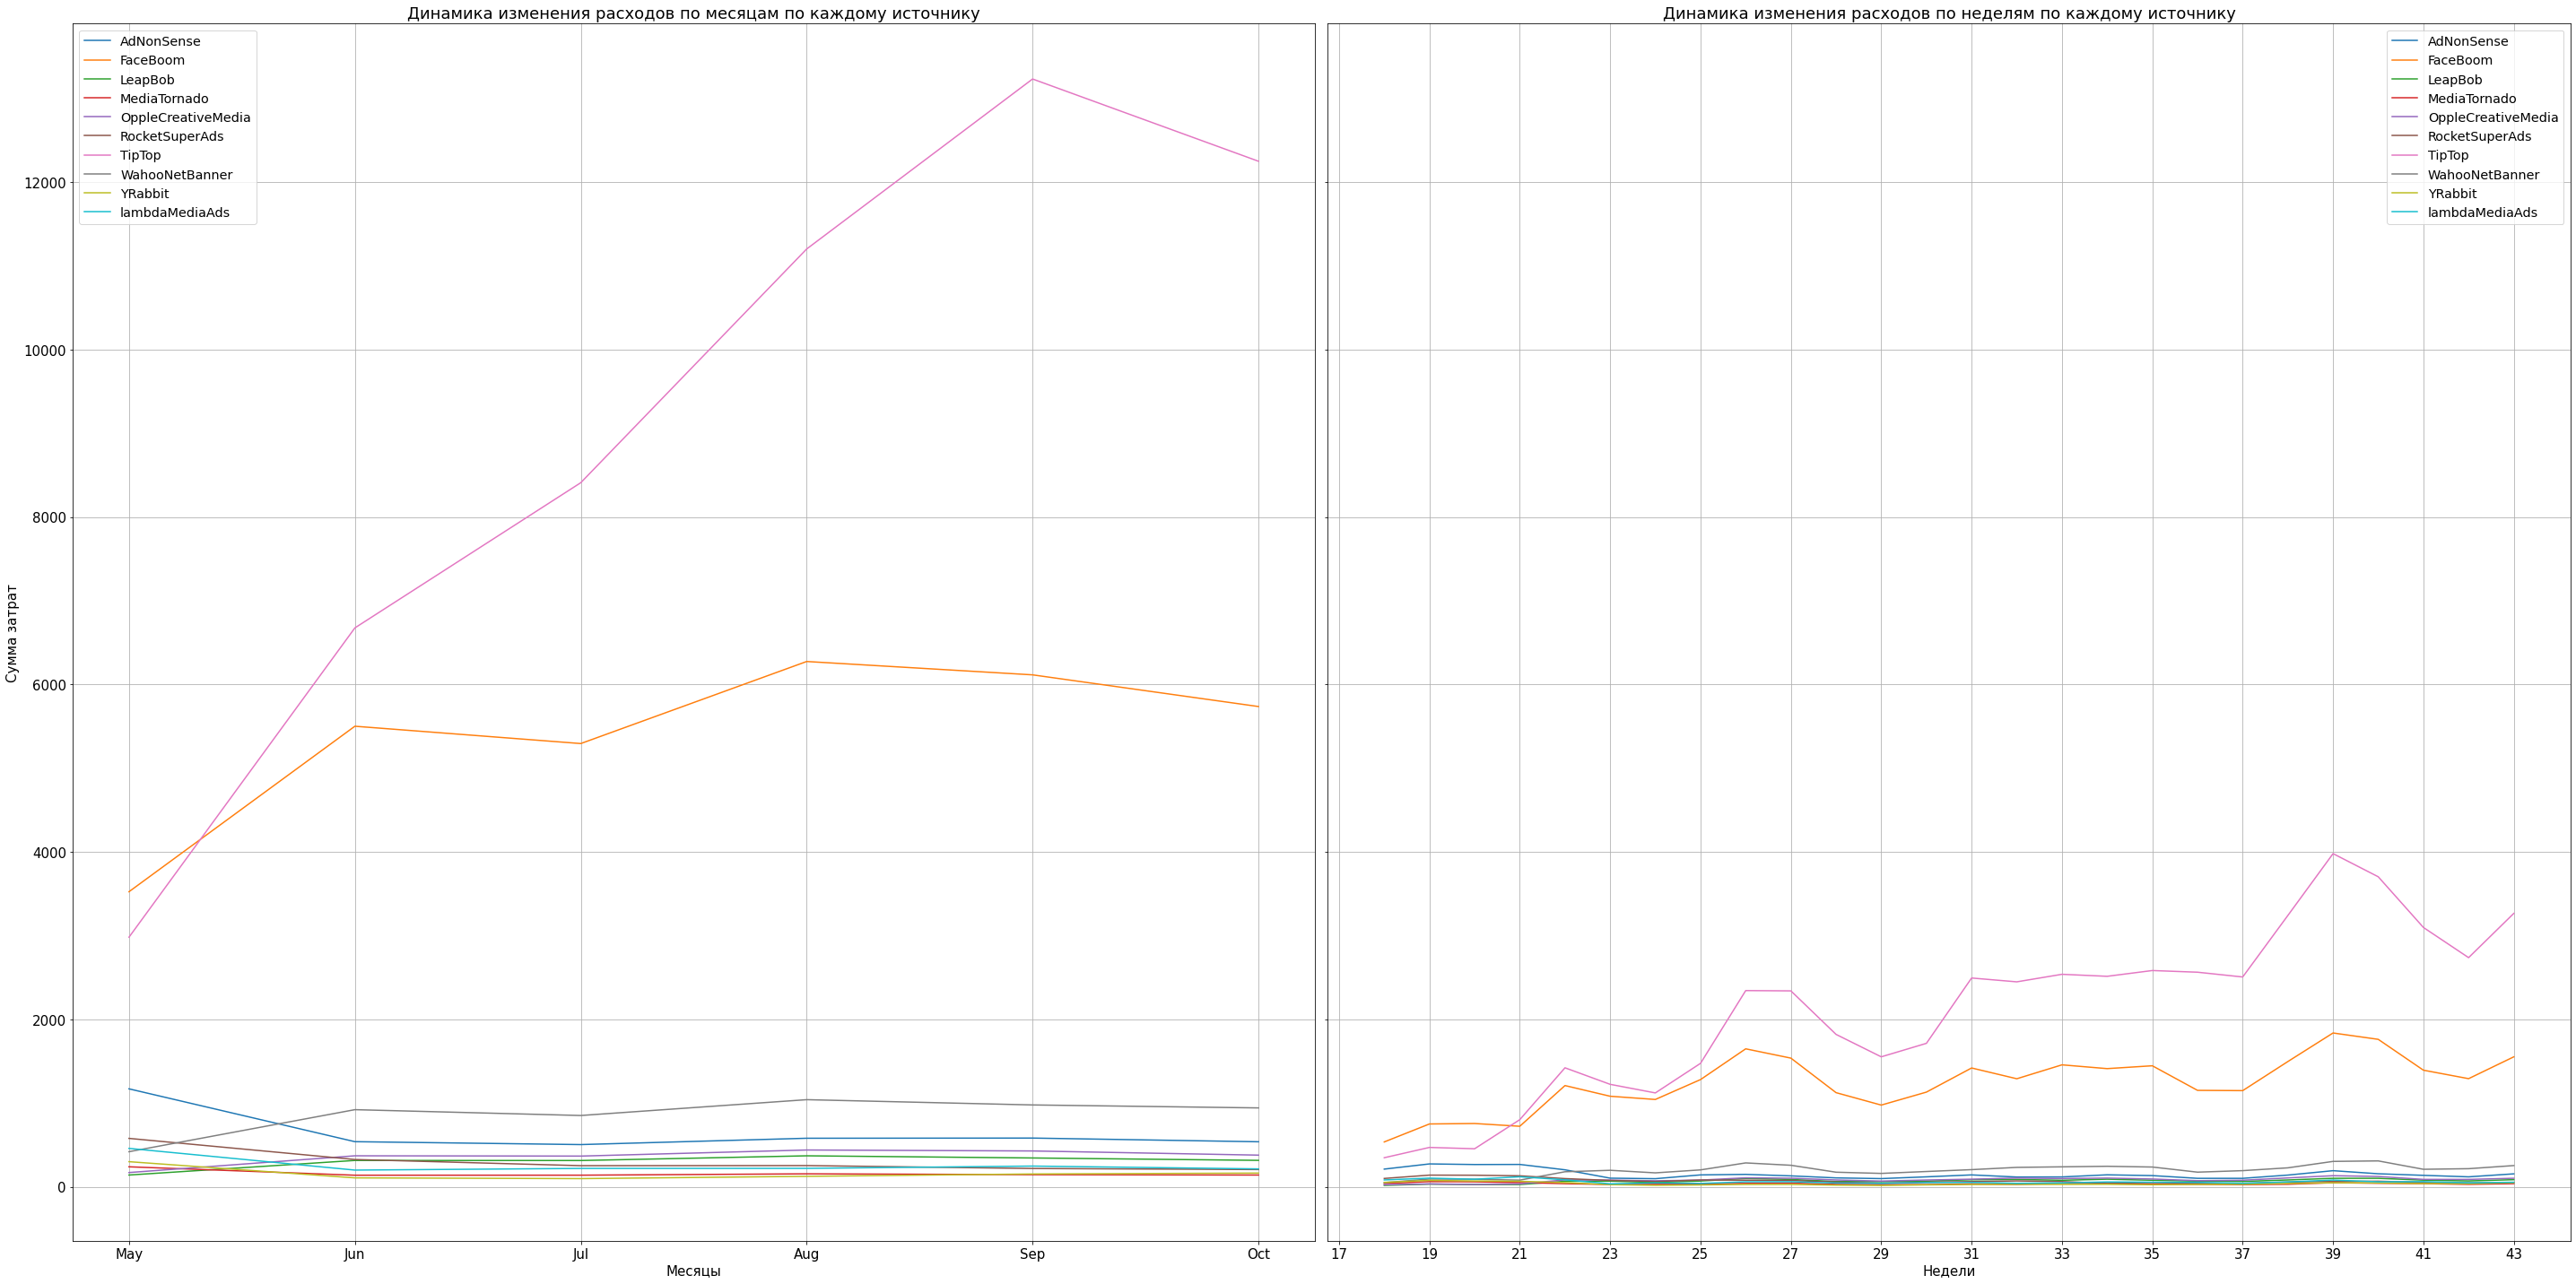

In [44]:

#plt.figure(figsize=(24, 10))
# первый график —  динамика изменения расходов по месяцам по каждому источнику
plt.rcParams['figure.figsize'] = [40,20]
ax1 = plt.subplot(1, 2, 1)
cost_month.plot(grid=True, ax=ax1)
ax1.xaxis.set_ticks([0,1,2,3,4,5])
ax1.set_xticklabels(['May','Jun','Jul','Aug','Sep','Oct'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize="x-large")
plt.ylabel('Сумма затрат',fontsize=15)
plt.xlabel('Месяцы',fontsize=15)
plt.title('Динамика изменения расходов по месяцам по каждому источнику',fontsize=18)

# второй график — динамика изменения расходов по неделям по каждому источнику
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
cost_week.plot(grid=True, ax=ax2)
ax2.set_xticks(np.arange(17,44,2))
plt.xticks(fontsize=15)
plt.xlabel('Недели',fontsize=15)
plt.title('Динамика изменения расходов по неделям по каждому источнику',fontsize=18)
plt.legend(fontsize="x-large")
plt.tight_layout()
plt.show()

Как и предполагалось наиболее "затратными" рекламными компаниями являятся продвижение в каналах  "TipTop" и "FaceBoom".В разрезе месяцев на третьем месте "WahooNetBanner". Остальные находятся примерно на одном уровне. 

### Сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

In [45]:
# составим сводную таблицу используя профили пользовтаелей
cac=profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean')

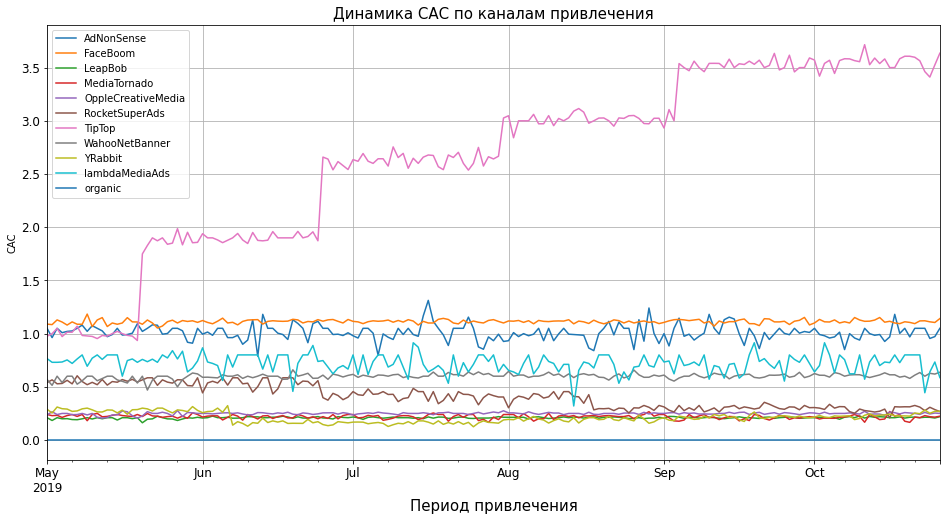

In [46]:
# и отобразим эти данные на графике 
cac.plot(grid=True, figsize=(16, 8))
plt.ylabel('CAC')
plt.xlabel('Период привлечения',fontsize=15)
plt.title('Динамика САС по каналам привлечения',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize="medium")
plt.show()

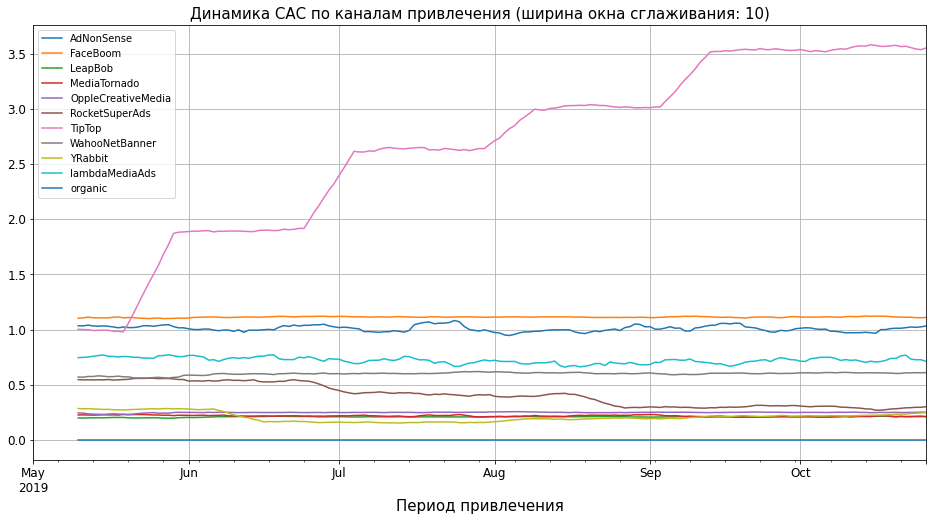

In [47]:
# сгладим пики 
window = 10
filter_data(cac, window).plot(grid=True, figsize=(16, 8))
plt.title('Динамика САС по каналам привлечения (ширина окна сглаживания: {})'.format(window),fontsize=15)
plt.xlabel('Период привлечения',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize="medium")
plt.show() 

In [48]:
# считаем общий средний CAC по каналам привлечения
cac_mean = (
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'}).sort_values(by='cac',ascending=False)
)
cac_mean

,cac
channel,
TipTop,2.79
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.73
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
MediaTornado,0.22
YRabbit,0.22


По прежнему в лидерах 
- "TipTop" (самый дорогой канал в пересчете на однго пользователя; и стоимость только растет - необходима дополнительная проверка)
- "FaceBoom" 
- "AdNonSense" 
- "RocketSuperAds" наоборот со временем показывает снижение стоимости что положительно сказывается на общих затратах.

Вывод по маркетинговому анализу :
    
- Определен общий бюджет рекламной компании 
- Уточнены наиболее затратные каналы (TipTop", "FaceBoom" и "AdNonSense" ). Их окупаемость следует проверить в первую очередь.
- Динамика затрат за наблюдаемый период представлена в графическом виде в разрезе недель и месяцев
- Определена средняя стоимость привлечения одного пользователя (CAC) из каждого источника. Так же это представлено на графике. Наиболее дорогие по общему бюджету каналы так же и дороже остапльных в пересчете на уникального клиента. Да они приводят большое количество аббонентов. Но такой же объем клиентов при более тщательной работе с другими каналами может обойтись компании в меньшую сумму.

## Анализ окупаемости рекламы. 

Используем  следующие метрики:
 - LTV («пожизненная ценность» клиента)
 - ROI (на сколько «окупились» клиенты)
 - CAC (сколько компании обходится каждый новый клиент). 

In [49]:
# Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, 
#что пользователи должны окупаться не позднее чем через две недели после привлечения
observation_date=datetime(2019,11,1).date()
horizon_days=14

### Окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [50]:
# считаем LTV и ROI 
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=[])

In [51]:
# из расчетов нам следует исключить пользователей с органическим трафиком: 
# поскольку мы за них ничего не платим,  а нам нужно изучить именно окупаемость рекламы. 
profiles = profiles.query('channel != "organic"')

In [52]:
# считаем LTV и ROI с учетом только платящих пользователей
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=[])

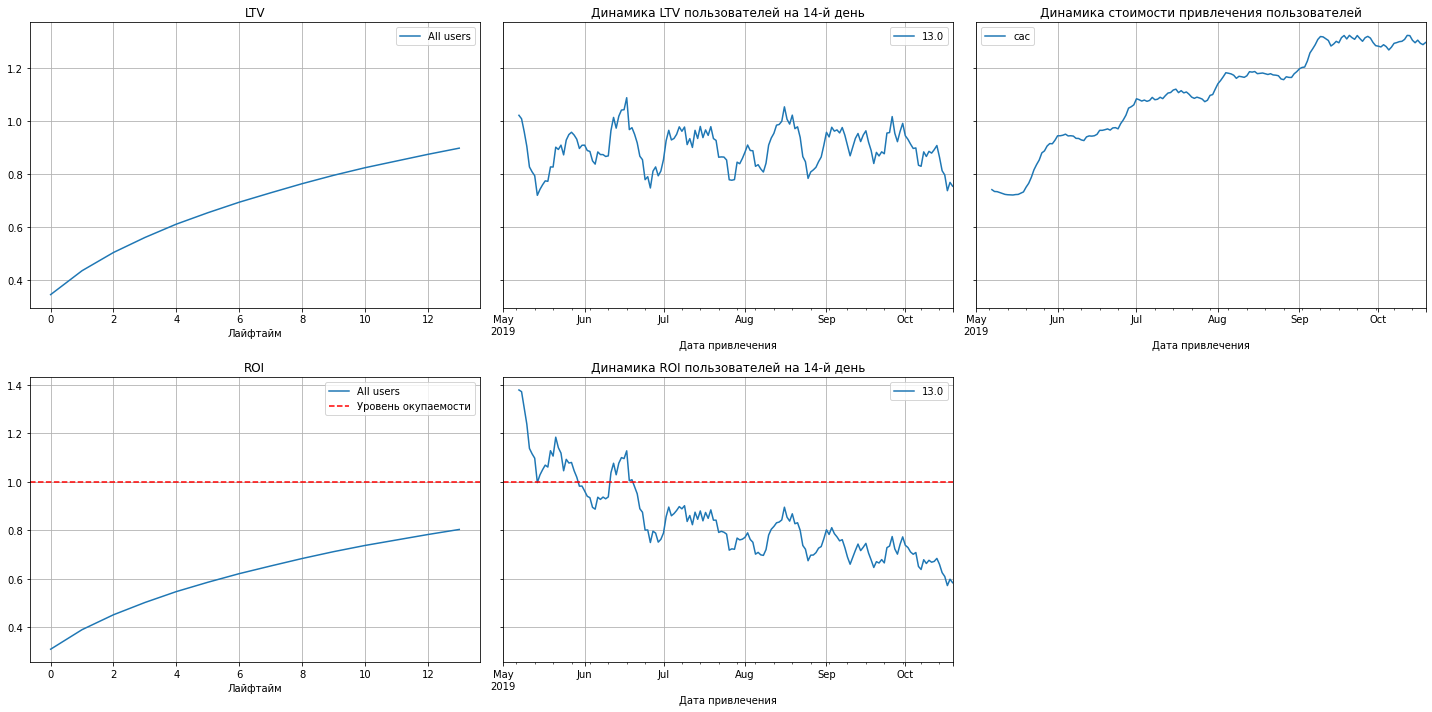

In [53]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7) #  графики LTV, CAC и ROI

- ROI **сильно** не дотягивает до целевого уровня. Двухнедельный горизонт анализа говорит об отсутсвии окупаемости рекламной компании. Динамика ROI за лайфтайм падает
- CAC растет на всем периоде.  
- Резкий рост САС и одновременное снижение ROI в июне коррелирует с ростом стоимости привлечения из канала "TipTop".
- LTV стабилен. Плавный рост без снижений.Наблюдается цикличность. 

### Конверсия пользователей и динамика её изменения.

In [54]:
#считаем конверсию и строим график
conversion_raw, conversion, conversion_history  = get_conversion(profiles,orders,observation_date,horizon_days,dimensions=[])

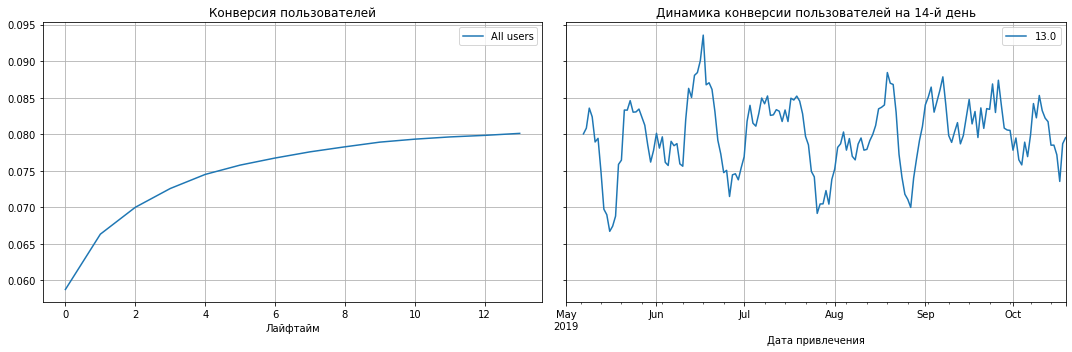

In [55]:
plot_conversion(conversion, conversion_history , horizon_days, window=7)

- Кривая конверсии плавно растёт от нуля в направлении единицы.
- Кривая конверсии не снижается.
- Динамика достаточно стабильна. 
- Переход пользователей дает основания полагать о качественном продукте востребованном рынком.

### Удержание пользователей и динамика его изменения.

In [56]:
retention_raw, retention, retention_history = get_retention(profiles,visits,observation_date,horizon_days,dimensions=[])

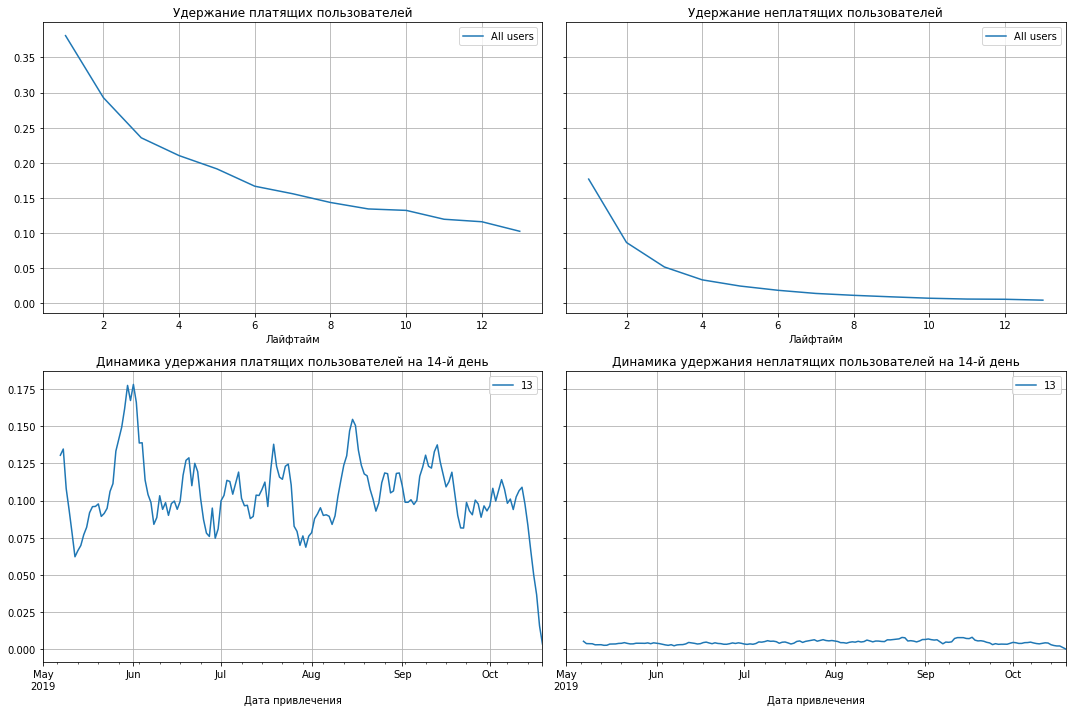

In [57]:
plot_retention(retention, retention_history, horizon_days, window=7)

- Кривая удержания платящих пользователей выше, чем неплатящих. Удержание неплатящих убывает быстрее, чем удержание платящих.
- Обе кривые постепенно снижаются.
- Удержание убывает по экспоненциальному закону.
- Динамика удержания стабильна
- В начале анализируемого периода она была выше. 
- После удаления данных после 27/10/2022 гафик динамики удержания выдает не совсем корректные данные в финальной части и либо надо уменьшать горизонт анализа / либо корректировтаь диапазон наблюдений

###  Анализ окупаемость рекламы с разбивкой по устройствам.

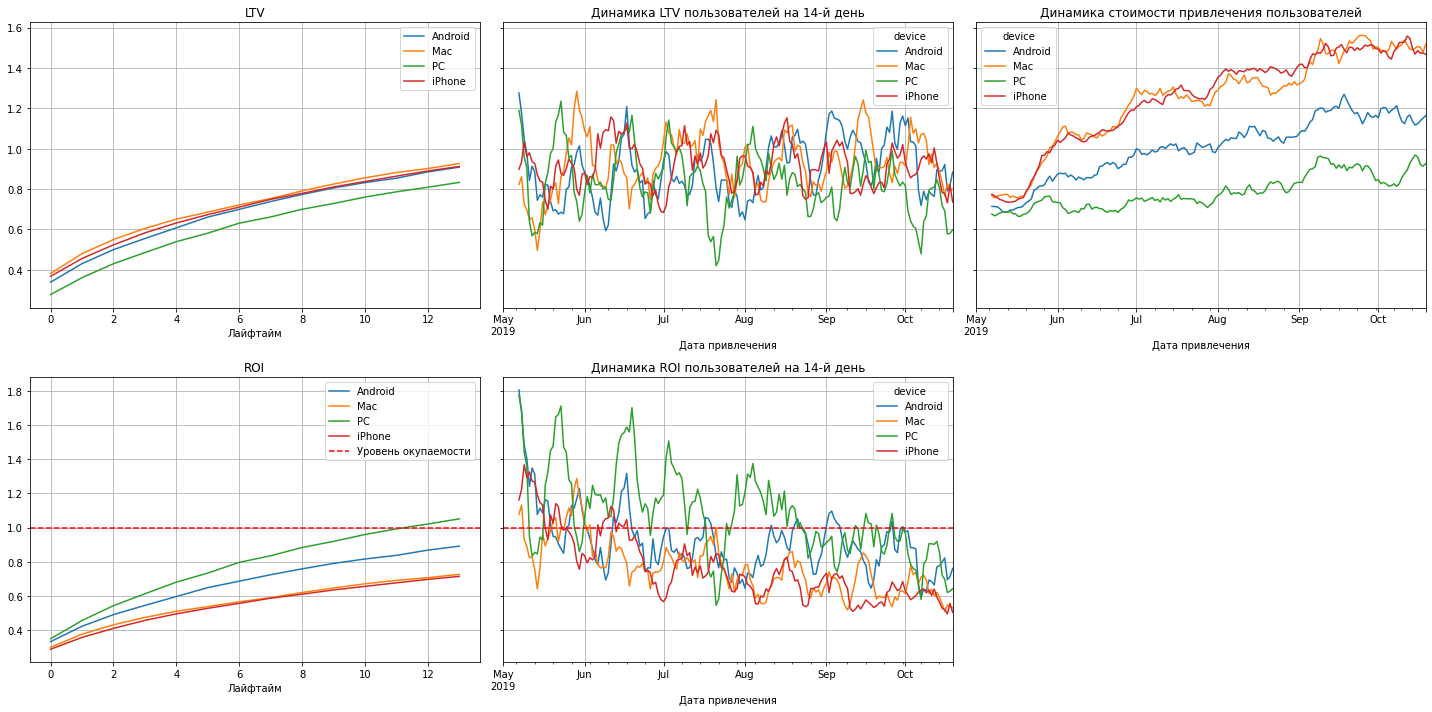

In [58]:
# считаем LTV и ROI 
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date,horizon_days, dimensions=['device']
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)
# постройте графики LTV, CAC и ROI

- LTV стабилен и однороден.
- Стоимость привлечения пользователей Mac и iPhone немного выше. Вполне закономерная тенденция с учетом что это другая ценовая группа.
- Окупаемость пользователей iPhone в целом вызывает вопросы.
- В динамике окупаемости график показывает неприятное снижение во второй половине анализируемого периода. Так же хуже всего показатели у пользователей Mac и iPhone.
- Окупаются толкьо пользователи стационарных компьютеров.

### Анализ окупаемость рекламы с разбивкой по странам.

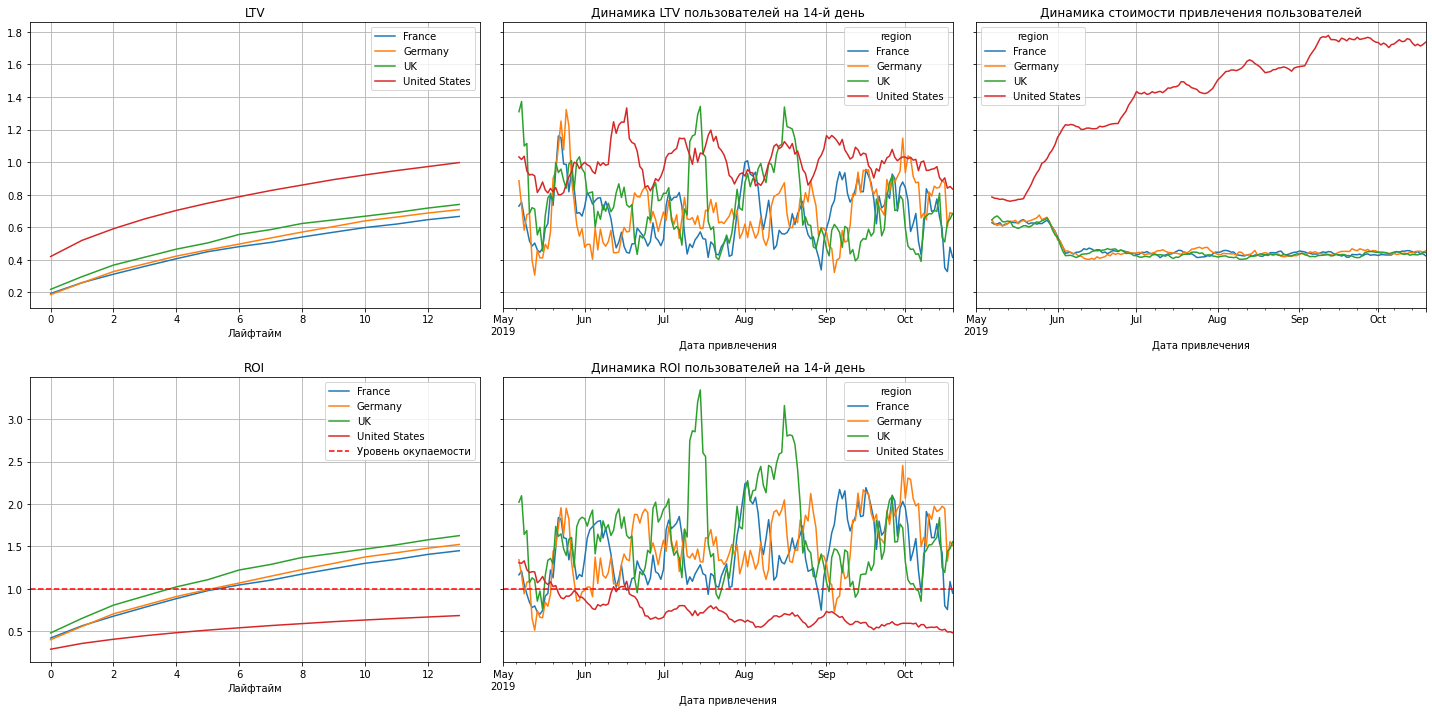

In [59]:
# считаем LTV и ROI 
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date,horizon_days, dimensions=['region']
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)
# постройте графики LTV, CAC и ROI

- Наиболее "дорогие" клиенты ( приносящие наибольшую прибыль ) - сосредоточены в США.
- Но их стоимость привлечения должна быть ниже. Слишком сильно отрывается от показателей остальных стран.
- ROI у пользователей из Соединенных Штатов так же слишком низок относительно остальных стран. На это стоит обратить особое внимание.

### Анализ окупаемость рекламы с разбивкой по рекламным каналам. 

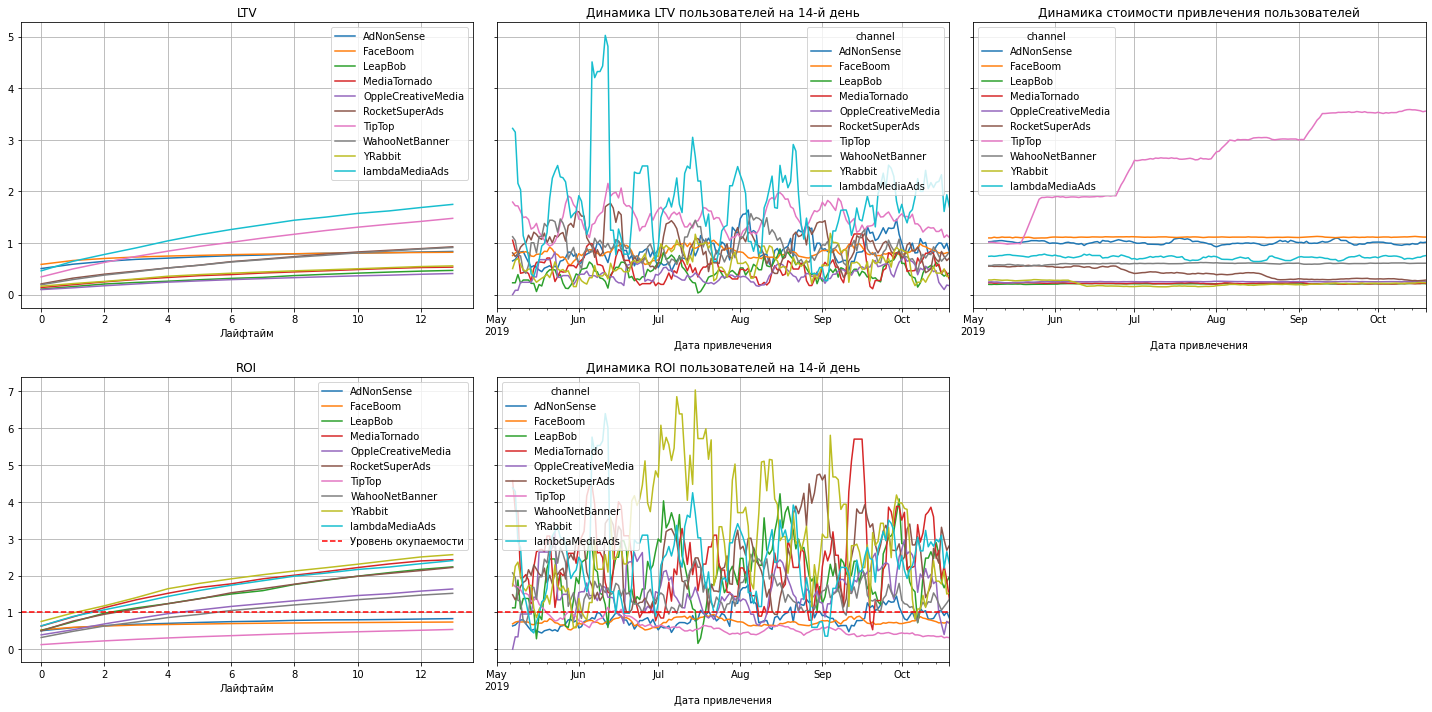

In [60]:
# считаем LTV и ROI 
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date,horizon_days, dimensions=['channel']
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)
# постройте графики LTV, CAC и ROI

- Доход от клиентов из всех каналов достаточно стабилен.
- Ввиду изначально количественно меньших затрат и высокой доли платящих пользователей канал "lambdaMediaAds" показывает результаты лучше остальных в части поступления денег от клиентов
- "TipTop" так же отрывается вперед по показателю платёжеспособности клиентов.
- Общая динамика стоимости привлечения по каналам была рассмотрена ранее.
- Возврат инвестиций в привлечение стабилен. Однако "TipTop", "AdNonSense" и "FaceBoom" не дотягивают до целевого порога на двухнедельном горизонте.
- Лучше других каналов по окупаемости  показал себя "YRabbit".

Проведен в графическом виде анализ окупаемости рекламы в общем виде и с деталировкой при использовании метрик:
    
- LTV
- ROI
- CAC
- Проанализирована конверсия и удержание клиентов


- Двухнедельный горизонт анализа говорит об отсутсвии окупаемости рекламной компании.
- Определенные в маркетинговом и исследовательском анализе группы ( США; Mac/ iPhone;"FaceBoom" / "TipTop") при тщательном анализе выявили существенные проблемы в окупаемости всей рекламной компании .
- Наиболее дорогой канал "TipTop" не окупается. Что  отрицательно сказывается на показателях рекламной компании.

## Проверяем гипотезу проблемы рекламной компании

- Проблемный участок - это пользователи  mac и iphone из США пришедшие через каналы "TipTop", "AdNonSense" и "FaceBoom". пользователи РС чуствуют себя несколько лучше - это может служить отправной точкой для детального разбора

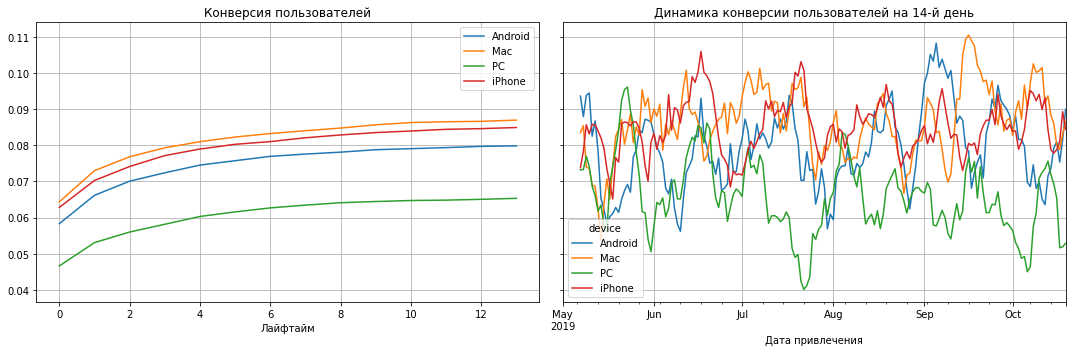

In [61]:
# отследим конверсию пользователей по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,orders,observation_date,horizon_days, dimensions=['device'])

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Все в рамках необходимых значений. iPhone и Mac лучше остальных.

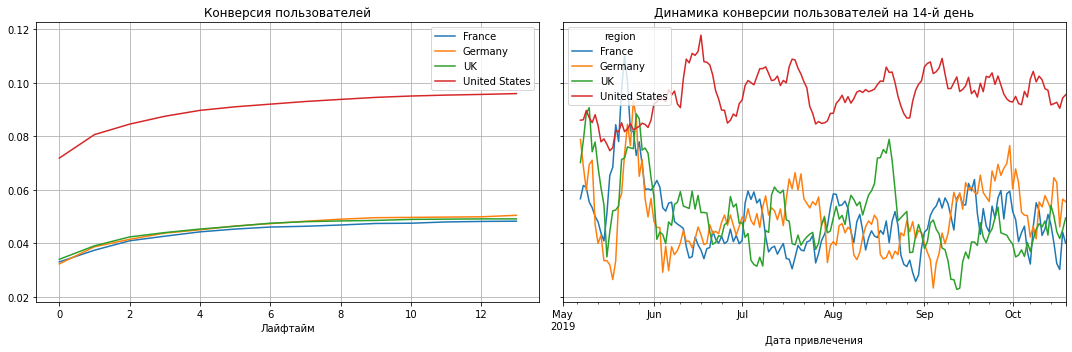

In [62]:
## отследим конверсию пользователей по регионам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,orders,observation_date,horizon_days, dimensions=['region'])

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователй из США даже выше нормы. Вытягивает общий показатель наверх

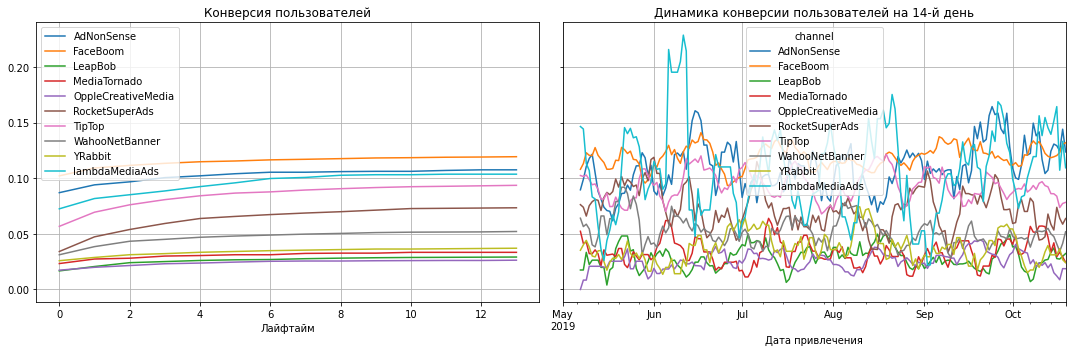

In [63]:
# отследим конверсию пользователей по каналам привлечения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,orders,observation_date,horizon_days, dimensions=['channel'])

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Наши подозреваемые ( "TipTop","AdNonSense" и "FaceBoom") ведут себя очень хорошо

Конверсия пользователей не выявила проблемы. Проверим удержание всех пользователей в таком же подробдном варианте.

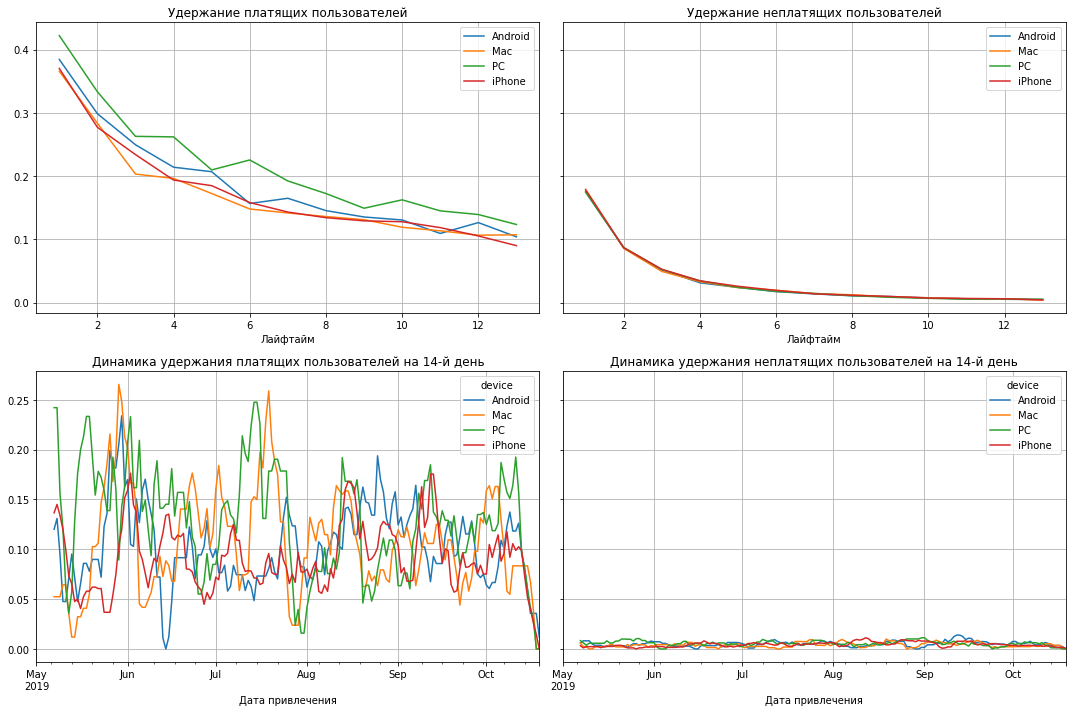

In [64]:
# отследим удержание пользователей по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Все устройства показывают схожие параметры.

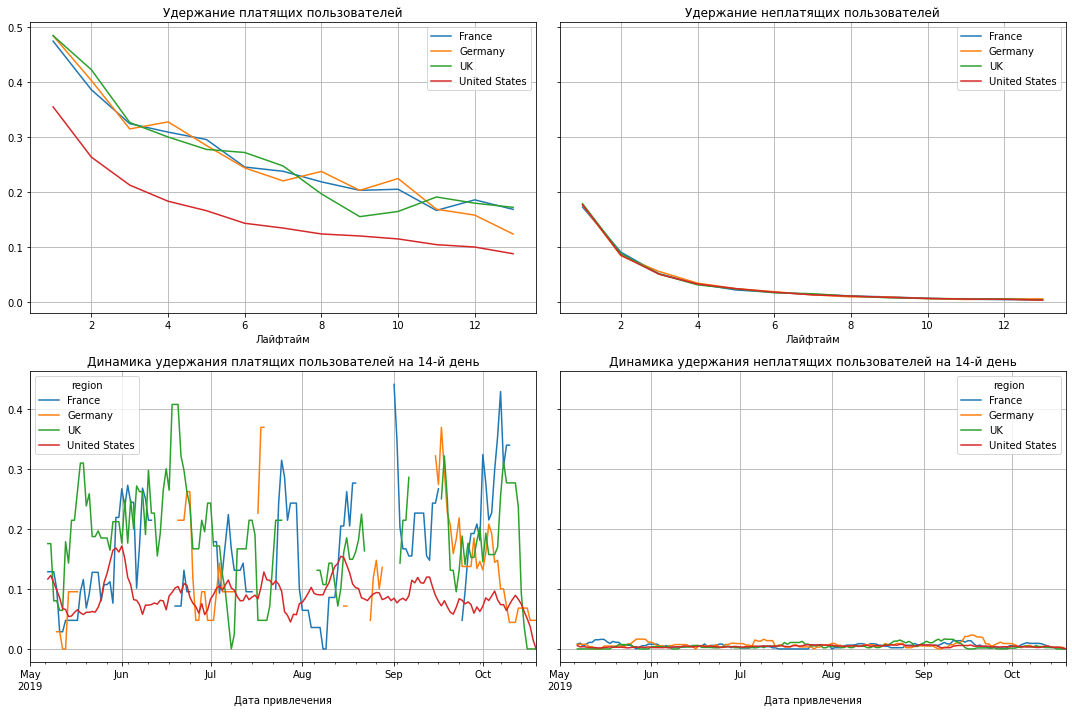

In [65]:
# отследим удержание пользователей по странам привлечения
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region'])

plot_retention(retention_grouped, retention_history, horizon_days)

Обнаружено что в США плохое удержание всех пользователей вне зависимости от устройств.

Остается уточнить удержание пользователей по каналам привлечения и сможем сделать итоговый вывод.

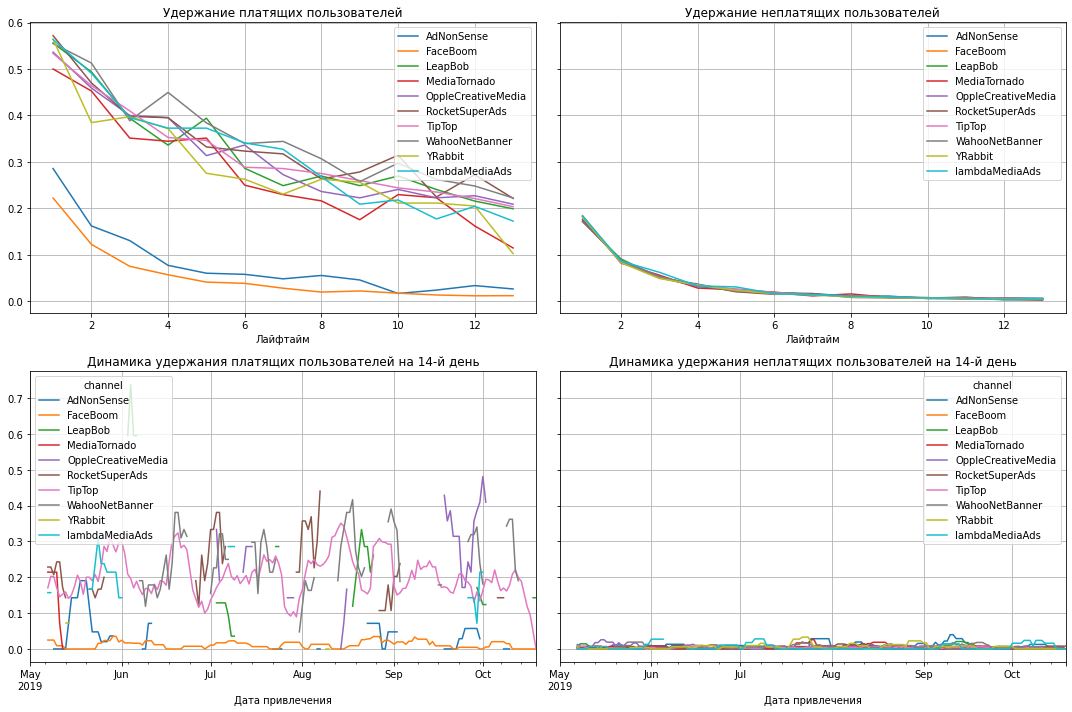

In [66]:
# отследим удержание пользователей по каналам привлечения
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel'])

plot_retention(retention_grouped, retention_history, horizon_days)

Обнаружено крайне плохое удержание пришедших по каналам привлечения "AdNonSense" и "FaceBoom"


Для точного вывода о причинах необходимо детально проанализировать поведение наших клиентов. Обычно такая информация хранится в данных о дополнительных событиях

## Выводы и рекомендации


    Проанализированы полученные данные о проведенной в течении 6 месяцев рекламной компании 
    Исходная информация подготовлена для тщательного анализа
      
В ходе анализа проведена следующая работа:

    Составлены уникальные профили пользователей
    
    Определено и представлено в табличном виде:
    -- количество пользователей и доля платящих из каждой страны
    -- количество пользователей и доля платящих для каждого устройства.
    -- количество пользователей и долю платящих для каждого канала привлечения
    
    Выделена общая сумма расходов на маркетинг , а так же 
    - распределение трат по рекламным источникам
    - динамика изменения расходов во времени (по неделям и месяцам) по каждому источнику
    - определена средняя стоимость привлечения одного пользователя из каждого источника
    - подготовлены графики 
      -- сводный график динамики расходов на маркетинг
      -- график динамики САС по каналам привлечения
        
     проведен в графическом виде анализ окупаемости рекламы в общем виде и с деталировкой при использовании метрик
     
   - LTV  
   - ROI  
   - CAC  
   
    проанализирована конверсия и удержание клиентов 

Итог анализа:

- ROI не дотягивает до целевого уровня. Двухнедельный горизонт анализа говорит об отсутствии окупаемости рекламной компании.

- Не смотря на первоначальные подозрения окупаемсть у каналов  "WahooNetBanner" и "OppleCreativeMedia" на приемлемом уровне, а вот первоначальные фавориты как по устройствам , так и по странам , так и по каналам привлечения, наоборот при тщательном анализе выявили существенные проблемы в окупаемости всей рекламной компании .

- Сильное негативное влияние на окупаемость оказывают пользователи iphone из США пришедшие через каналы  "AdNonSense" и "FaceBoom".
- Проблемы  вызваны низким удержанием пользователей связанными с рекламными компаниями в США на каналах "AdNonSense" и "FaceBoom".
- Окупаемость наиболее дорогого канала "TipTop" не достигает целевого значения что так же сильно отрицательно сказывается на показателях рекламной компании.

Рекомендация отделу маркетинга
- Необходимы дополнительные данные для анализа. Отелу маркетинга необходимо провести собственное расследование по каналам "AdNonSense" и "FaceBoom" в США или выгрузить данные для анализа событий.


- Лучше других каналов по окупаемости показал себя "YRabbit".
- "RocketSuperAds" наоборот со временем показывает снижение стоимости что положительно сказывается на общих затратах. 